## Observations and Insights 

In [1]:
 %matplotlib notebook

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import sem

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mice_tumor_all_df= pd.merge(mouse_metadata,study_results, how= 'outer', on= 'Mouse ID' )
# Display the data table for preview
mice_tumor_all_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
mice_tumor_all_df.columns

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'],
      dtype='object')

In [4]:
for x in range(len(mice_tumor_all_df)):
    mice_tumor_all_df.loc[x,'ID Time']= str(mice_tumor_all_df.loc[x, "Mouse ID"]) + str(mice_tumor_all_df.loc[x,'Timepoint'])
mice_tumor_all_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,ID Time
0,k403,Ramicane,Male,21,16,0,45.000000,0,k4030
1,k403,Ramicane,Male,21,16,5,38.825898,0,k4035
2,k403,Ramicane,Male,21,16,10,35.014271,1,k40310
3,k403,Ramicane,Male,21,16,15,34.223992,1,k40315
4,k403,Ramicane,Male,21,16,20,32.997729,1,k40320
...,...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2,z96925
1889,z969,Naftisol,Male,9,30,30,65.841013,3,z96930
1890,z969,Naftisol,Male,9,30,35,69.176246,4,z96935
1891,z969,Naftisol,Male,9,30,40,70.314904,4,z96940


In [5]:
for x in range(len(mice_tumor_all_df)):
    if x != 0:
        if mice_tumor_all_df.loc[x-1, "ID Time"] ==  mice_tumor_all_df.loc[x,'ID Time']:
            mice_tumor_all_df.loc[x, "Duplicate"]= 'True'
            start = mice_tumor_all_df.loc[x,'ID Time']
        else:
            mice_tumor_all_df.loc[x, "Duplicate"]= 'False'
mice_tumor_all_df.loc[0,'Duplicate'] = 'False'            
mice_tumor_all_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,ID Time,Duplicate
0,k403,Ramicane,Male,21,16,0,45.000000,0,k4030,False
1,k403,Ramicane,Male,21,16,5,38.825898,0,k4035,False
2,k403,Ramicane,Male,21,16,10,35.014271,1,k40310,False
3,k403,Ramicane,Male,21,16,15,34.223992,1,k40315,False
4,k403,Ramicane,Male,21,16,20,32.997729,1,k40320,False
...,...,...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2,z96925,False
1889,z969,Naftisol,Male,9,30,30,65.841013,3,z96930,False
1890,z969,Naftisol,Male,9,30,35,69.176246,4,z96935,False
1891,z969,Naftisol,Male,9,30,40,70.314904,4,z96940,False


In [6]:
#mice_tumor_all_df.groupby['Duplicate'].count()
mice_tumor_all_df.groupby('Duplicate').count()[['Mouse ID']]

,Mouse ID
Duplicate,
False,1888
True,5


In [7]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_data=pd.DataFrame(mice_tumor_all_df[mice_tumor_all_df.Duplicate == 'True'])
duplicate_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,ID Time,Duplicate
909,g989,Propriva,Female,21,26,0,45.000000,0,g9890,True
911,g989,Propriva,Female,21,26,5,47.570392,0,g9895,True
913,g989,Propriva,Female,21,26,10,49.880528,0,g98910,True
915,g989,Propriva,Female,21,26,15,53.442020,0,g98915,True
917,g989,Propriva,Female,21,26,20,54.657650,1,g98920,True


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mice_df=pd.DataFrame(mice_tumor_all_df[mice_tumor_all_df.Duplicate == 'False'])
clean_mice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,ID Time,Duplicate
0,k403,Ramicane,Male,21,16,0,45.000000,0,k4030,False
1,k403,Ramicane,Male,21,16,5,38.825898,0,k4035,False
2,k403,Ramicane,Male,21,16,10,35.014271,1,k40310,False
3,k403,Ramicane,Male,21,16,15,34.223992,1,k40315,False
4,k403,Ramicane,Male,21,16,20,32.997729,1,k40320,False
...,...,...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2,z96925,False
1889,z969,Naftisol,Male,9,30,30,65.841013,3,z96930,False
1890,z969,Naftisol,Male,9,30,35,69.176246,4,z96935,False
1891,z969,Naftisol,Male,9,30,40,70.314904,4,z96940,False


In [9]:
# Checking the number of mice in the clean DataFrame.
mice_count = len(clean_mice_df["Mouse ID"].unique())
mice_count

249

## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.



In [11]:
drug_names = clean_mice_df["Drug Regimen"].unique()
drug_names

array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
      dtype=object)

In [12]:
tumor_size_data_df = pd.DataFrame([[0],
                                      [0],
                                      [0],
                                      [0],
                                      [0]],
                                  index= ['Mean', 'Median', 'Variance', 'St Dev', 'SEM'],
                                  columns=[]) 
tumor_size_data_df

""
Mean
Median
Variance
St Dev
SEM


In [13]:
 #mean, median, variance, standard deviation, and SEM of the tumor volume. 

#This DF is for ALL data


for x in drug_names:
    tumor_size_array = pd.DataFrame(clean_mice_df[mice_tumor_all_df['Drug Regimen'] == x])
    tumorsize= tumor_size_array["Tumor Volume (mm3)"]
    
    mean_tumor = round(np.mean(tumorsize),2)
    median_tumor = round(np.median(tumorsize),2)
    var_tumor = round(np.var(tumorsize),2)
    st_tumor = round(np.std(tumorsize),2)
    sem_tumor = round(sem(tumorsize),2)
    
    tumor_size_data_df[x] = pd.DataFrame([[mean_tumor],
                                          [median_tumor],
                                          [var_tumor],
                                          [st_tumor],
                                          [sem_tumor]],
                                        index= ['Mean', 'Median', 'Variance', 'St Dev', 'SEM'],
                                        columns=[x])

#used to test my calculations    
#print(f"The mean temperature at the LAX airport is {sem_tumor}")
tumor_size_data_df

<ipython-input-13-3abbfbfb0859>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tumor_size_array = pd.DataFrame(clean_mice_df[mice_tumor_all_df['Drug Regimen'] == x])


,Ramicane,Capomulin,Infubinol,Placebo,Ceftamin,Stelasyn,Zoniferol,Ketapril,Propriva,Naftisol
Mean,40.22,40.68,52.88,54.03,52.59,54.23,53.24,55.24,52.39,54.33
Median,40.67,41.56,51.82,52.29,51.78,52.43,51.82,53.70,50.91,52.51
Variance,23.38,24.84,42.89,60.83,39.07,59.12,48.27,68.19,42.86,65.82
St Dev,4.84,4.98,6.55,7.80,6.25,7.69,6.95,8.26,6.55,8.11
SEM,0.32,0.33,0.49,0.58,0.47,0.57,0.52,0.60,0.53,0.60


In [14]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

In [15]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
x_axis = np.arange(len(drug_names))
x_axis


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [16]:
drug_count = pd.DataFrame(clean_mice_df.groupby('Drug Regimen').count()['Mouse ID'])
drug_count

,Mouse ID
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186
Placebo,181
Propriva,156
Ramicane,228
Stelasyn,181


In [17]:
#mice_ID_list = mice_tumor_all_df["Mouse ID"]

count_list = drug_count["Mouse ID"].values
count_list

array([230, 178, 178, 188, 186, 181, 156, 228, 181, 182])

In [18]:
drug_list=drug_count.index.values
drug_list

array(['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol',
       'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],
      dtype=object)

<IPython.core.display.Javascript object>


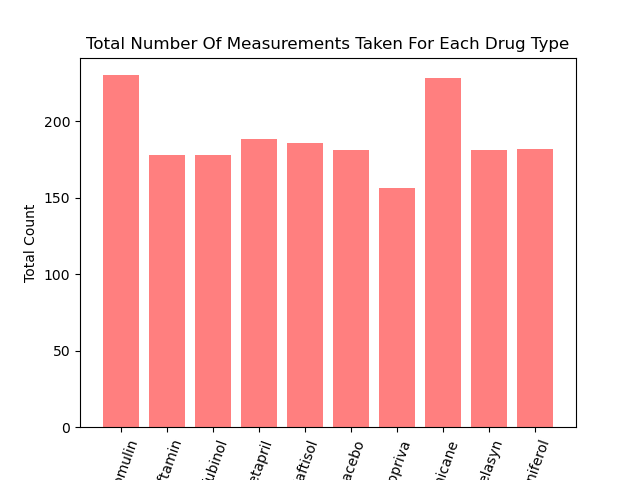

<BarContainer object of 10 artists>

In [19]:
plt.bar(x_axis, count_list, color='r', alpha=0.5, align="center")

In [20]:
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol',
       'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'])
plt.xticks(rotation=70)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Capomulin'),
  Text(1, 0, 'Ceftamin'),
  Text(2, 0, 'Infubinol'),
  Text(3, 0, 'Ketapril'),
  Text(4, 0, 'Naftisol'),
  Text(5, 0, 'Placebo'),
  Text(6, 0, 'Propriva'),
  Text(7, 0, 'Ramicane'),
  Text(8, 0, 'Stelasyn'),
  Text(9, 0, 'Zoniferol')])

In [21]:
# Give chart some labels and a tile
plt.title("Total Number Of Measurements Taken For Each Drug Type")
plt.xlabel("Drug Regimen Names")
plt.ylabel("Total Count")

Text(0, 0.5, 'Total Count')

In [22]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.



In [23]:
# Generate a pie plot showing the distribution of female versus male mice using pandas



In [24]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [25]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [26]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [27]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [28]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [29]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [30]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
